In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn_extra
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("C:\\Users\\pc\\Downloads\\marketing_campaign.csv", sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.drop(df.columns[15:25], axis=1, inplace=True)
df.drop(df.columns[16:19], axis=1, inplace=True)

In [5]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                2216 non-null   int64  
 1   Year_Birth        2216 non-null   int64  
 2   Education         2216 non-null   object 
 3   Marital_Status    2216 non-null   object 
 4   Income            2216 non-null   float64
 5   Kidhome           2216 non-null   int64  
 6   Teenhome          2216 non-null   int64  
 7   Dt_Customer       2216 non-null   object 
 8   Recency           2216 non-null   int64  
 9   MntWines          2216 non-null   int64  
 10  MntFruits         2216 non-null   int64  
 11  MntMeatProducts   2216 non-null   int64  
 12  MntFishProducts   2216 non-null   int64  
 13  MntSweetProducts  2216 non-null   int64  
 14  MntGoldProds      2216 non-null   int64  
 15  Complain          2216 non-null   int64  
dtypes: float64(1), int64(12), object(3)
memory usag

In [6]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format='mixed')
df['ID'] = df['ID'].astype(str)

In [7]:
df['Age']=2014-df['Year_Birth']
df.drop('Year_Birth',axis=1, inplace=True)

df['Num_Kids'] = df['Kidhome'] + df['Teenhome']
df['Amount'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [8]:
df.describe()

,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Complain,Age,Num_Kids,Amount
count,2216.000000,2216.000000,2216.000000,2216,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,2013-07-11 23:50:54.151624704,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,0.009477,45.179603,0.947202,607.075361
min,1730.000000,0.000000,0.000000,2012-01-08 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,5.000000
25%,35303.000000,0.000000,0.000000,2013-01-19 00:00:00,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,0.000000,37.000000,0.000000,69.000000
50%,51381.500000,0.000000,0.000000,2013-07-11 00:00:00,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,0.000000,44.000000,1.000000,396.500000
75%,68522.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,0.000000,55.000000,1.000000,1048.000000
max,666666.000000,2.000000,2.000000,2014-12-06 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,1.000000,121.000000,3.000000,2525.000000
std,25173.076661,0.536896,0.544181,NaN,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,0.096907,11.985554,0.749062,602.900476


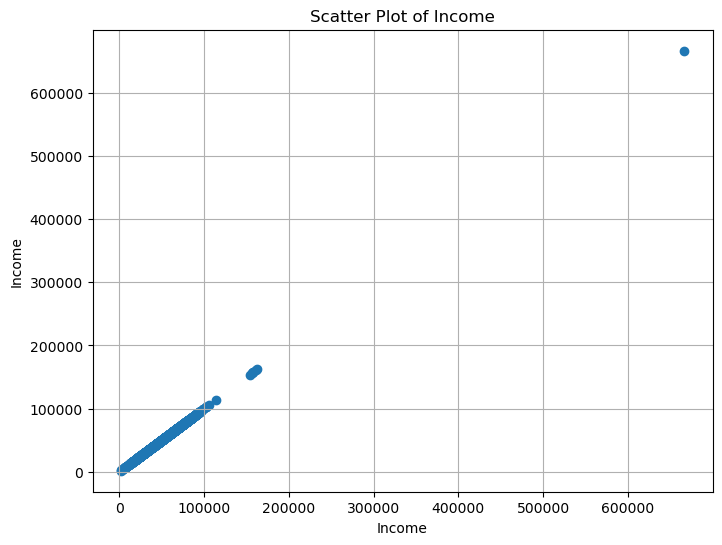

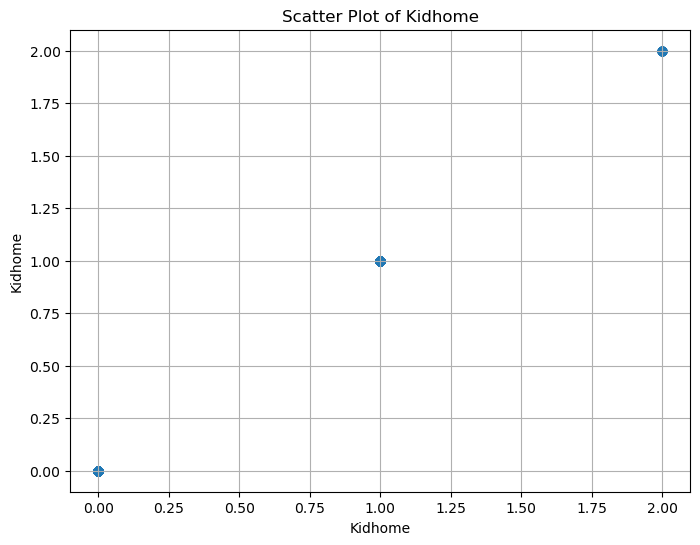

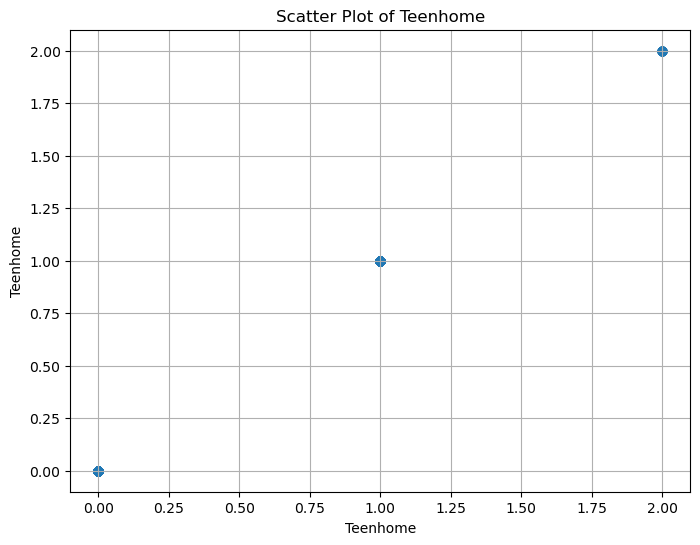

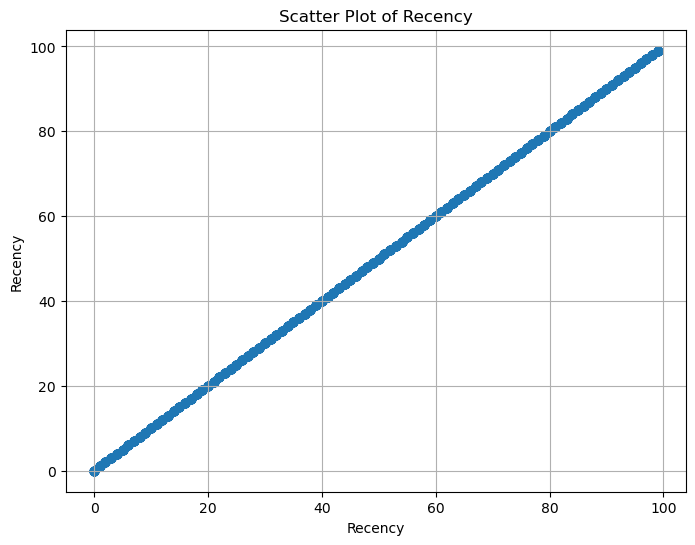

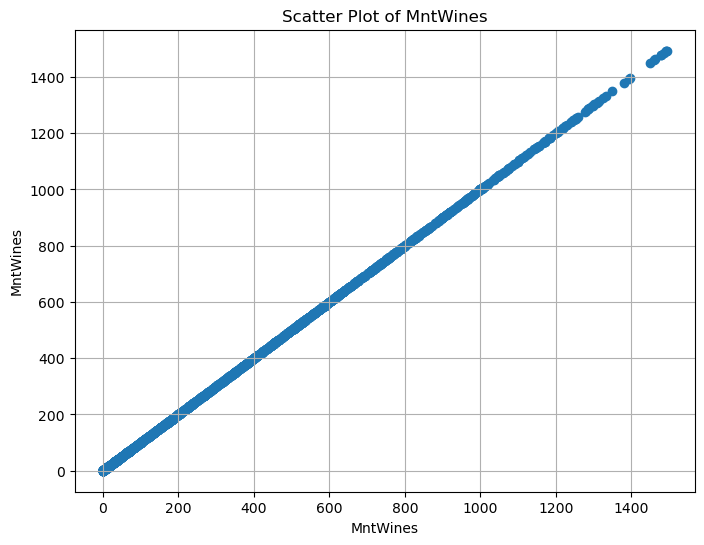

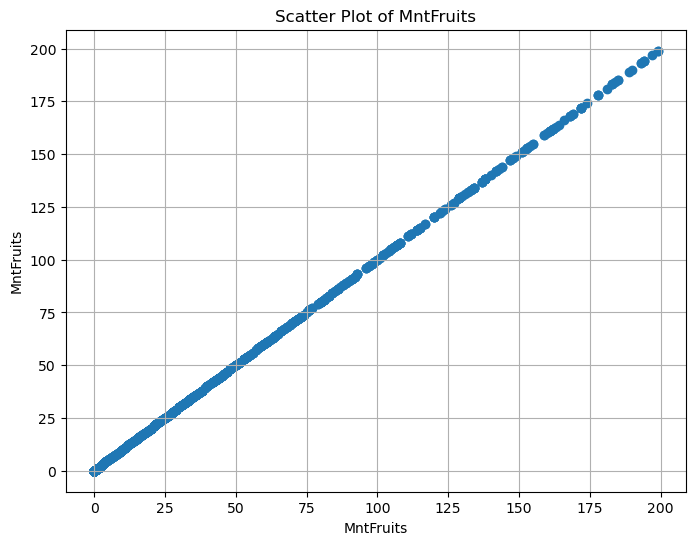

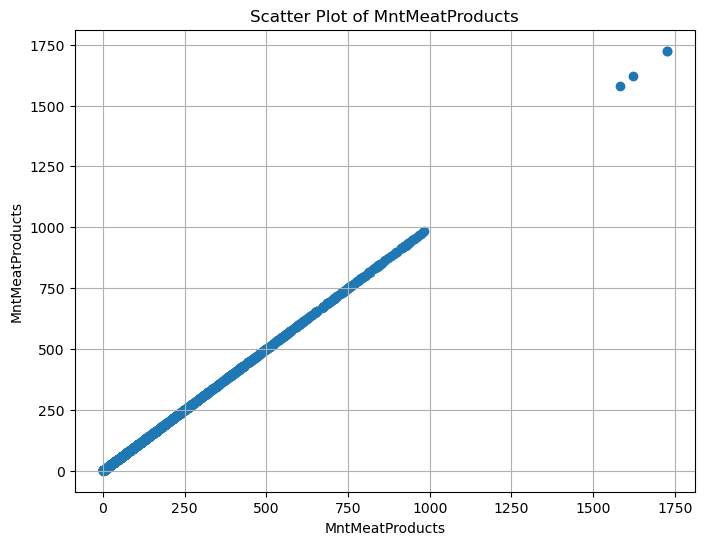

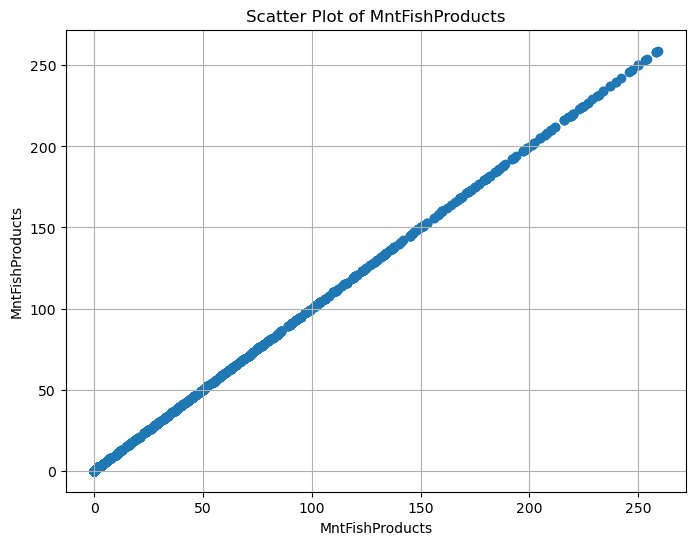

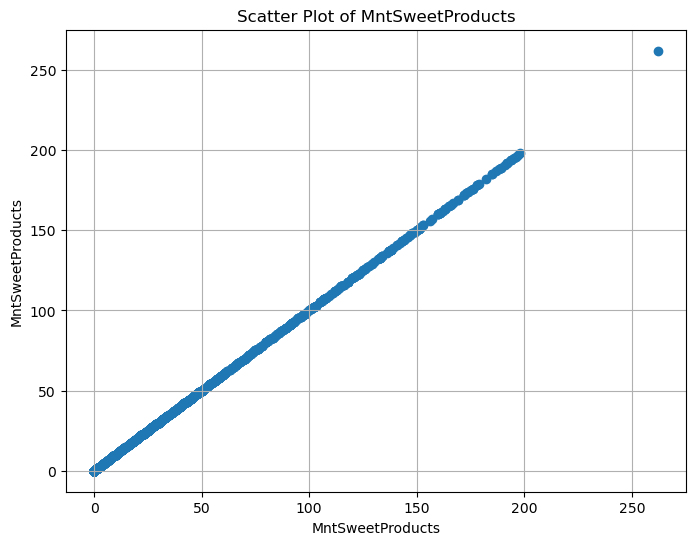

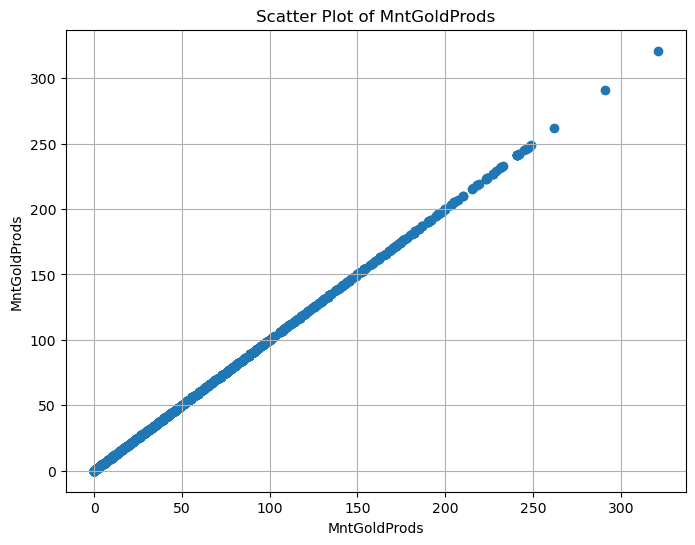

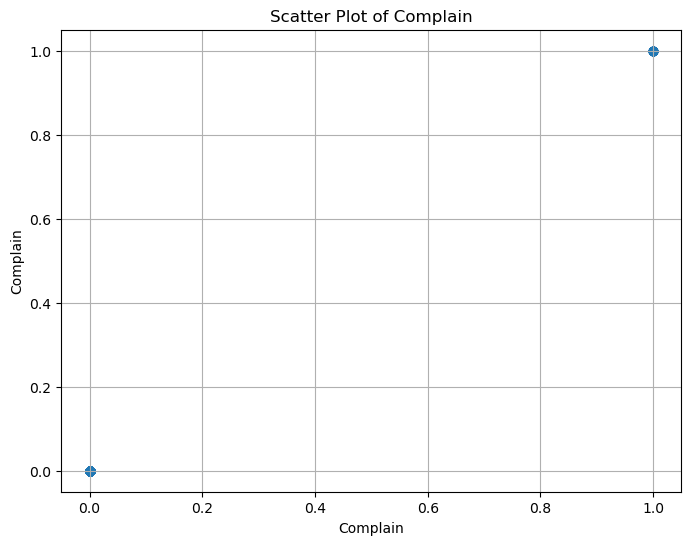

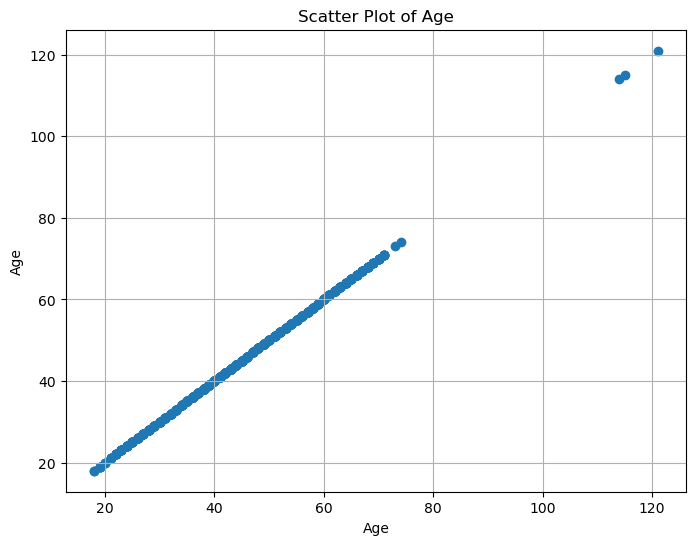

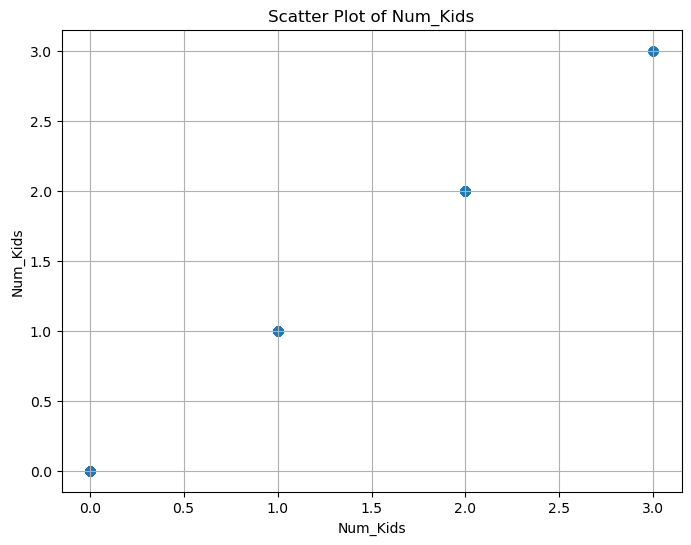

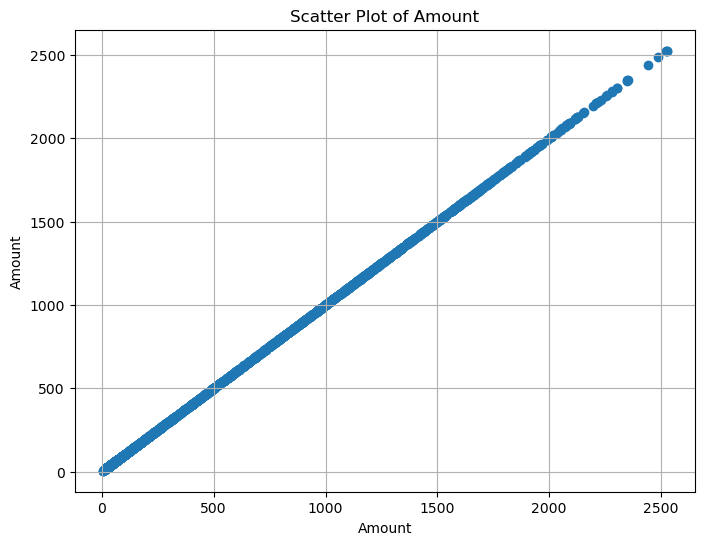

In [9]:
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
for column in numerical_columns.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[column], df[column])
    plt.title(f'Scatter Plot of {column}')
    plt.xlabel(column)
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

In [10]:
df = df[df["Age"]<90]
df = df[df["Income"]<150000]
df = df[df["MntMeatProducts"]<1500]
df = df[df["MntSweetProducts"]<250]

In [11]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

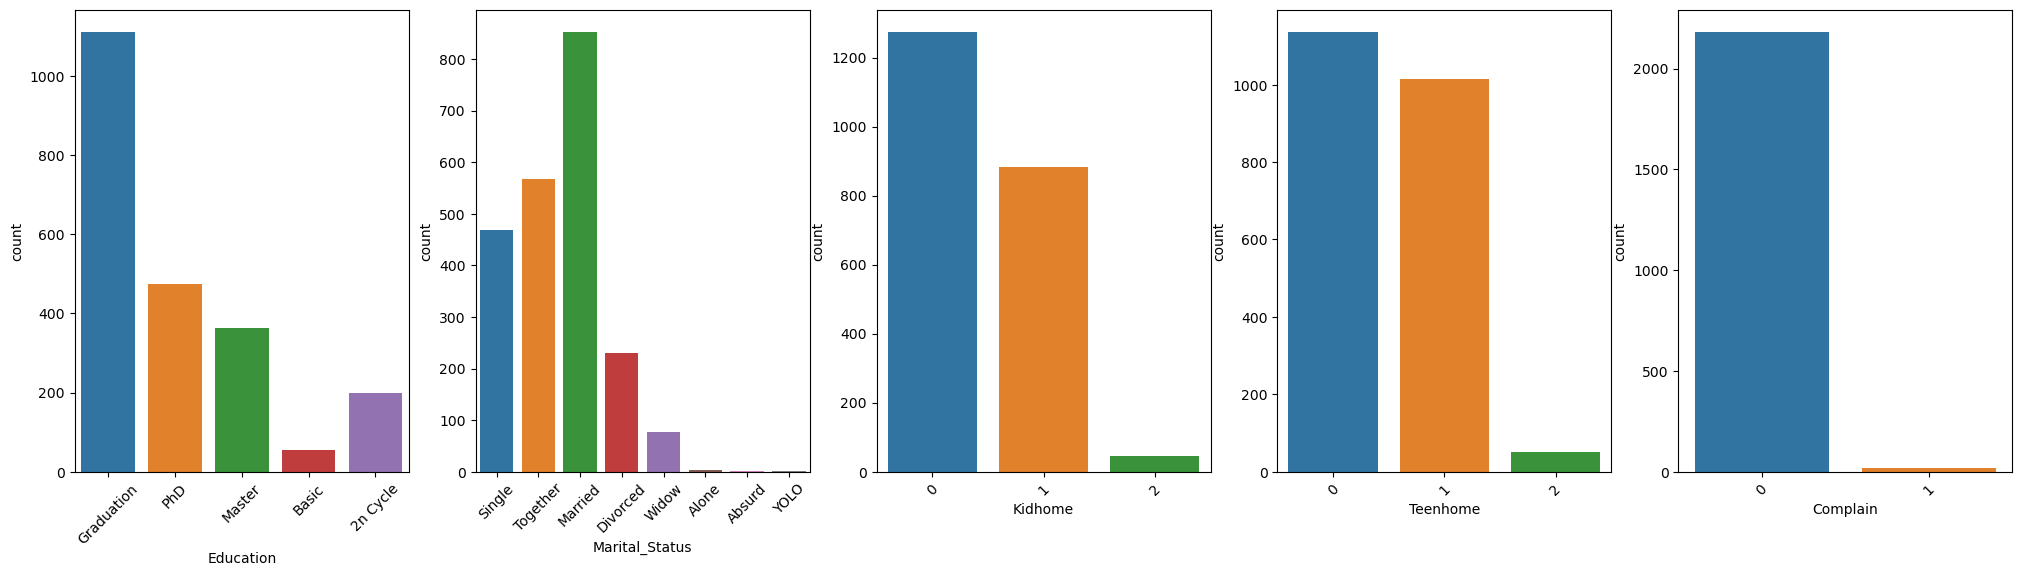

In [12]:
cal_cols = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Complain']
fig, ax = plt.subplots(1, len(cal_cols), figsize=(25, 6))
for col in enumerate(cal_cols):
    sns.countplot(data=df, x=col[1], ax=ax[col[0]])
    # rotate the x-axis labels
    # ax[col[0]].xticks(rotation=45)
    ax[col[0]].tick_params(axis='x', rotation=45)

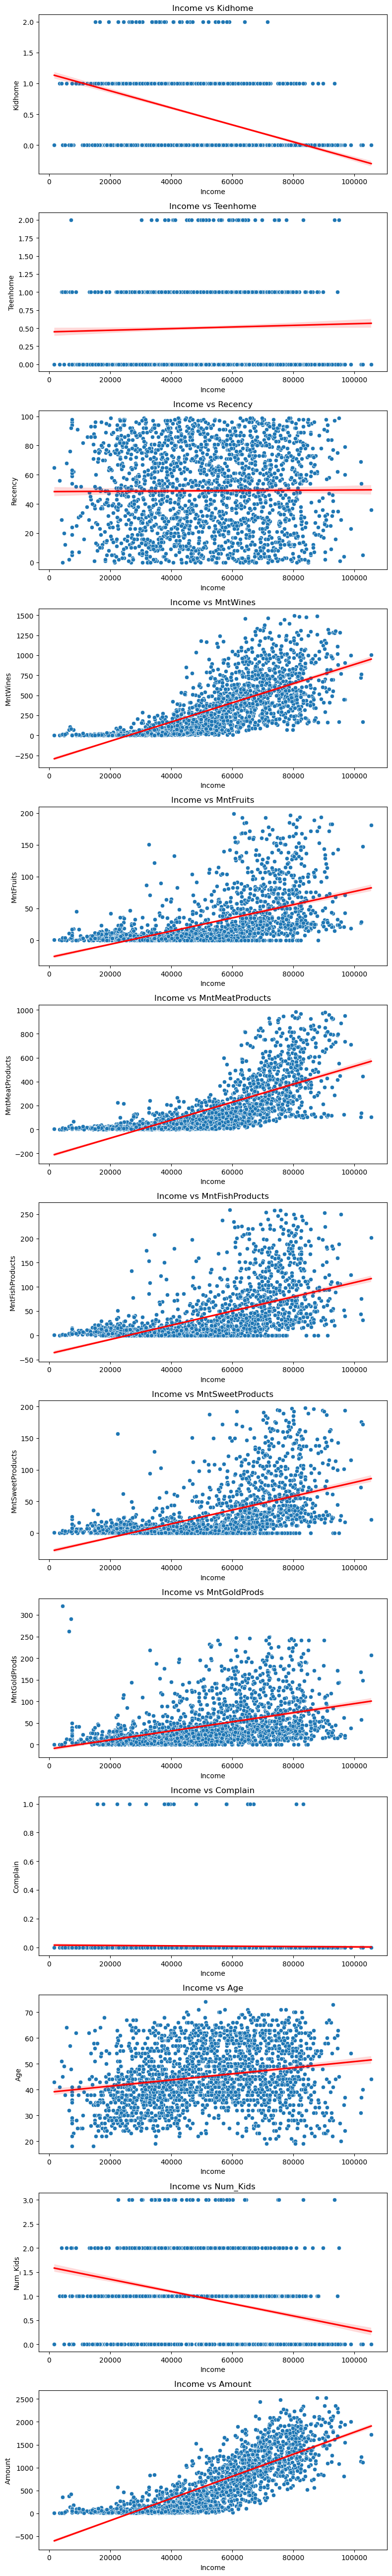

In [13]:
numerical_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Income'])

fig, axes = plt.subplots(nrows=numerical_df.shape[1], ncols=1, figsize=(8, 4 * numerical_df.shape[1]))

for i, column in enumerate(numerical_df.columns):
    sns.scatterplot(x='Income', y=column, data=df, ax=axes[i])
    axes[i].set_title(f"Income vs {column}")
    sns.regplot(x='Income', y=column, data=df, scatter=False, ax=axes[i], color='r')

plt.tight_layout()
plt.show()

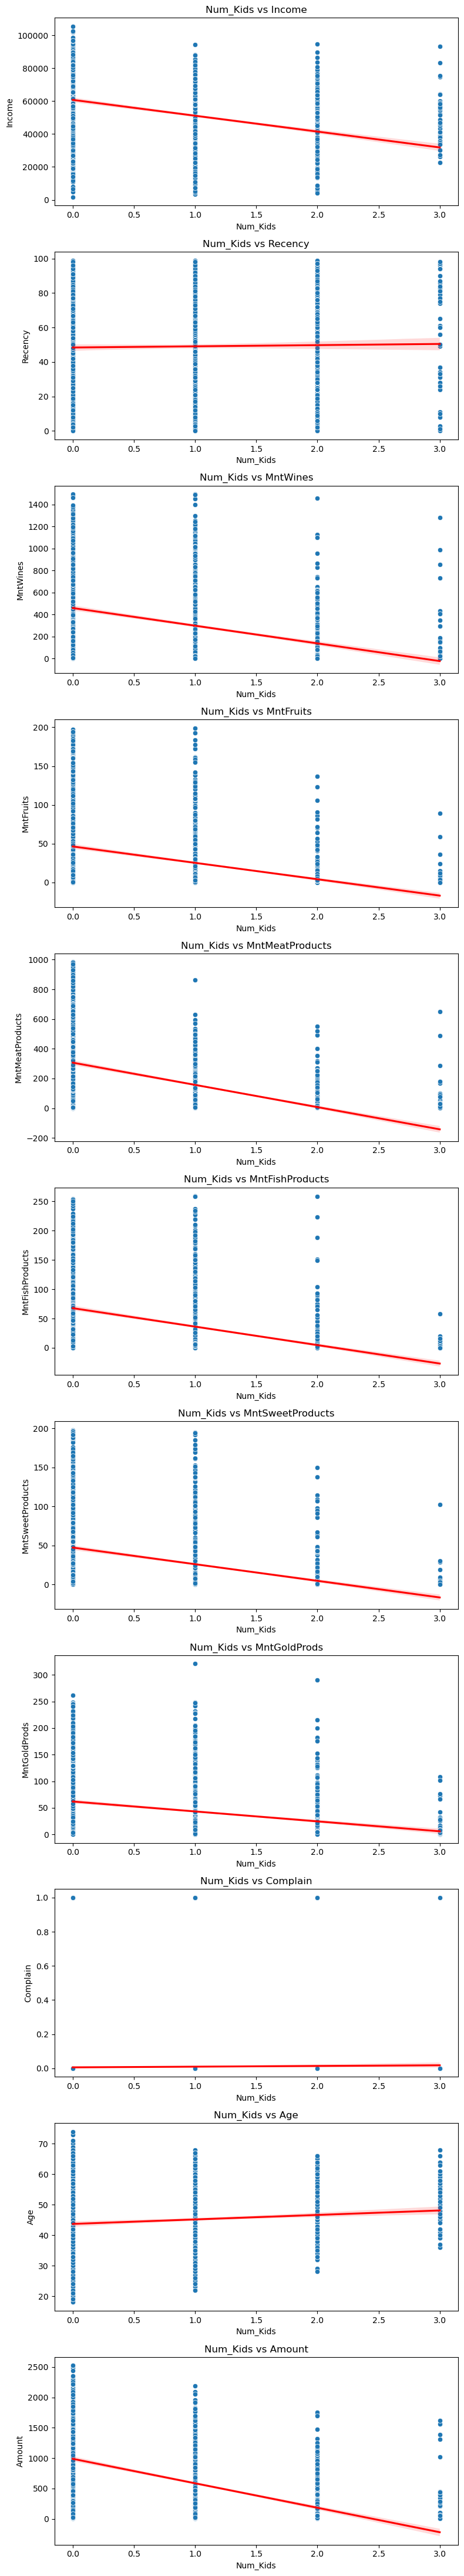

In [14]:
numerical_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Num_Kids', 'Kidhome', 'Teenhome'])

# Create subplots for Income vs all other numerical features
fig, axes = plt.subplots(nrows=numerical_df.shape[1], ncols=1, figsize=(8, 4 * numerical_df.shape[1]))

for i, column in enumerate(numerical_df.columns):
    sns.scatterplot(x='Num_Kids', y=column, data=df, ax=axes[i])
    axes[i].set_title(f"Num_Kids vs {column}")
    sns.regplot(x='Num_Kids', y=column, data=df, scatter=False, ax=axes[i], color='r')

plt.tight_layout()
plt.show()

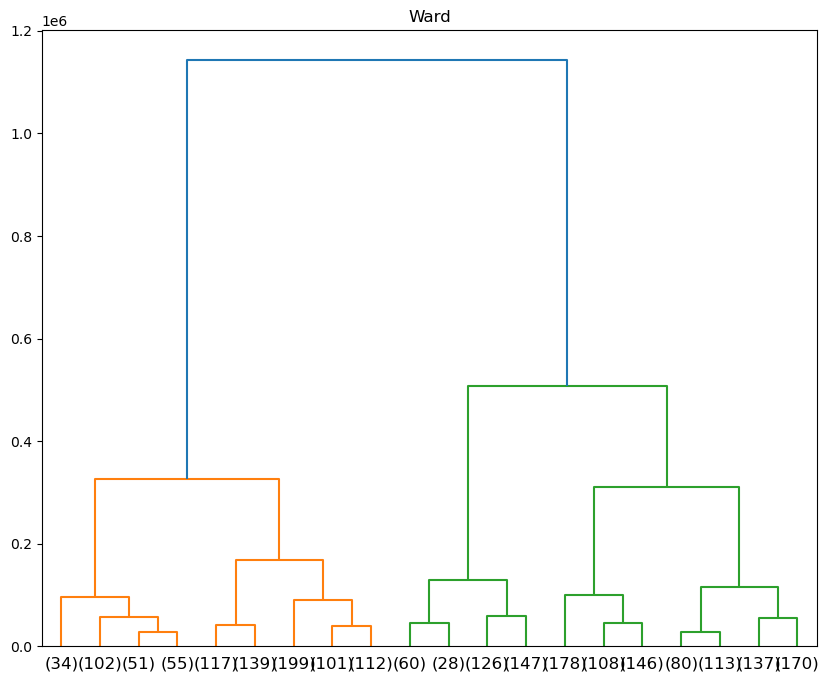

In [15]:
linkage_matrix = hierarchy.linkage(numerical_df, method='ward')
plt.figure(figsize=(10,8))
plt.title('Ward')
dendro = hierarchy.dendrogram(linkage_matrix, truncate_mode='lastp', p=20)

In [16]:
numerical_columns['ID'] = df['ID']
numerical_columns.set_index('ID', inplace=True)

In [17]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_columns)
k = 3
kmedoids = KMedoids(n_clusters=k, random_state=0).fit(scaled_data)
numerical_columns['Cluster_Id'] = kmedoids.labels_
clusters = numerical_columns['Cluster_Id'].value_counts()
clusters

Cluster_Id
1    860
2    705
0    651
Name: count, dtype: int64

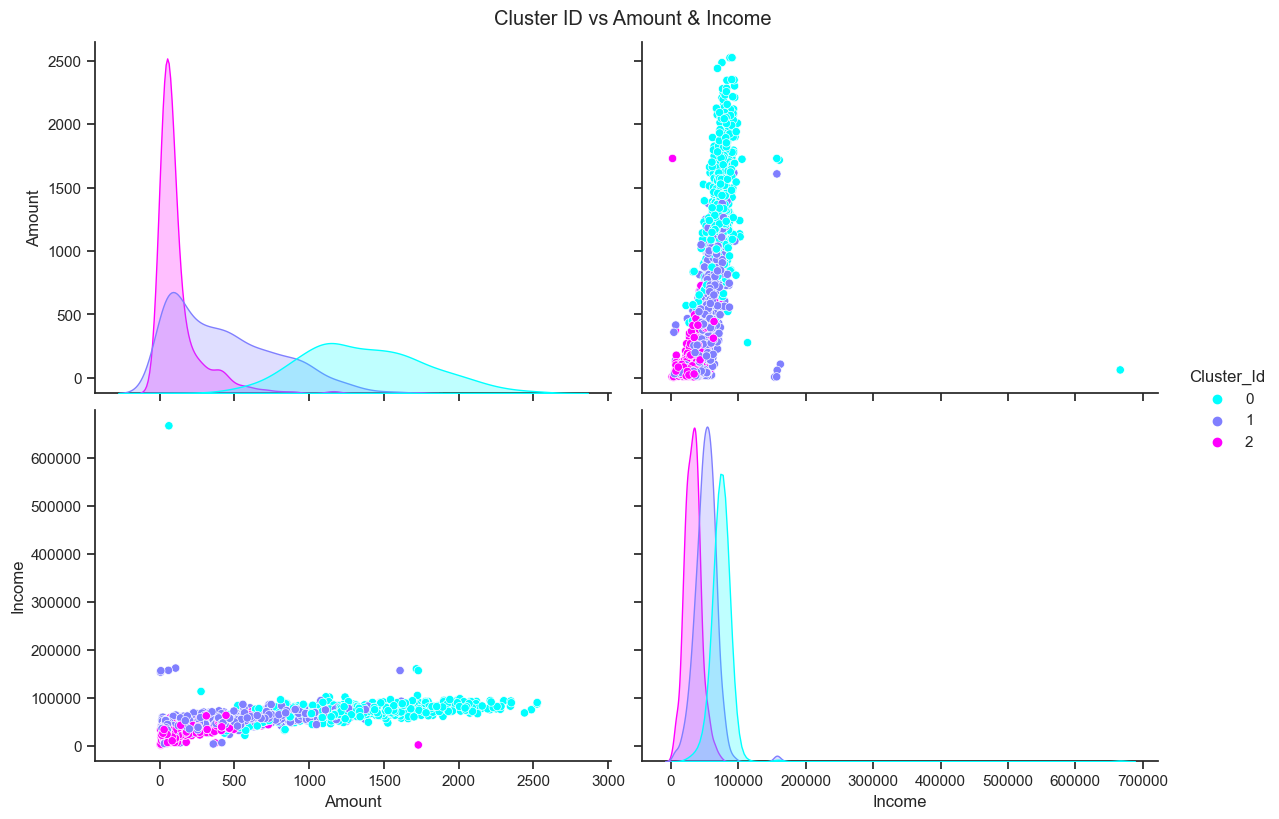

In [18]:
sns.set(style="ticks")
sns.pairplot(numerical_columns, hue='Cluster_Id', vars=['Amount', 'Income'], palette='cool', height=4, aspect=1.5)
plt.suptitle('Cluster ID vs Amount & Income', y=1.02)
plt.show()

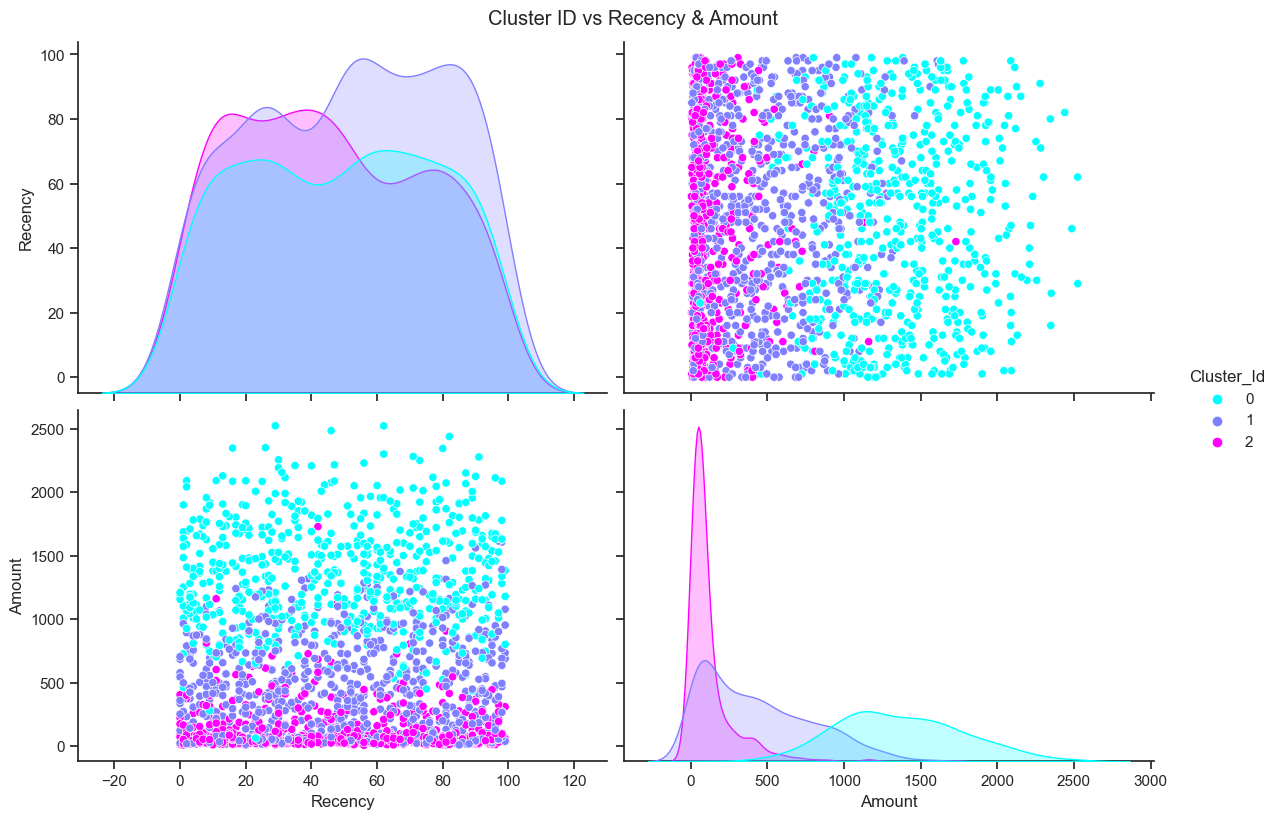

In [19]:
sns.set(style="ticks")
sns.pairplot(numerical_columns, hue='Cluster_Id', vars=['Recency', 'Amount'], palette='cool', height=4, aspect=1.5)
plt.suptitle('Cluster ID vs Recency & Amount', y=1.02)
plt.show()

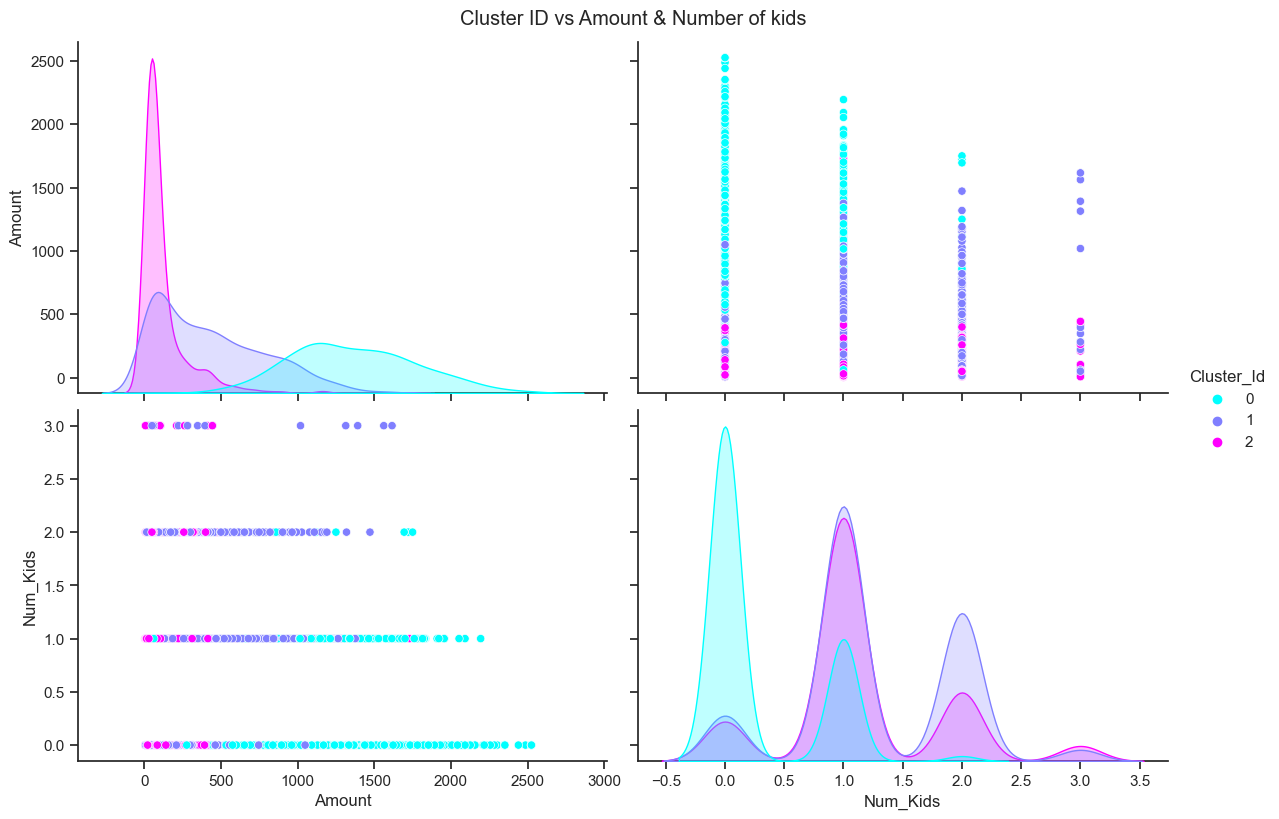

In [20]:
sns.set(style="ticks")
sns.pairplot(numerical_columns, hue='Cluster_Id', vars=['Amount', 'Num_Kids'], palette='cool', height=4, aspect=1.5)
plt.suptitle('Cluster ID vs Amount & Number of kids', y=1.02)
plt.show()

In [21]:
cols = ['ID','Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines','MntFruits','MntMeatProducts',\
        'MntFishProducts','MntSweetProducts','MntGoldProds','Age', 'Num_Kids', 'Amount', 'Complain']
df = pd.merge(numerical_columns, df, on=cols , how='inner')

In [34]:
cluster0_df = df[df['Cluster_Id'] == 0]
cluster1_df = df[df['Cluster_Id'] == 1]
cluster2_df = df[df['Cluster_Id'] == 2]

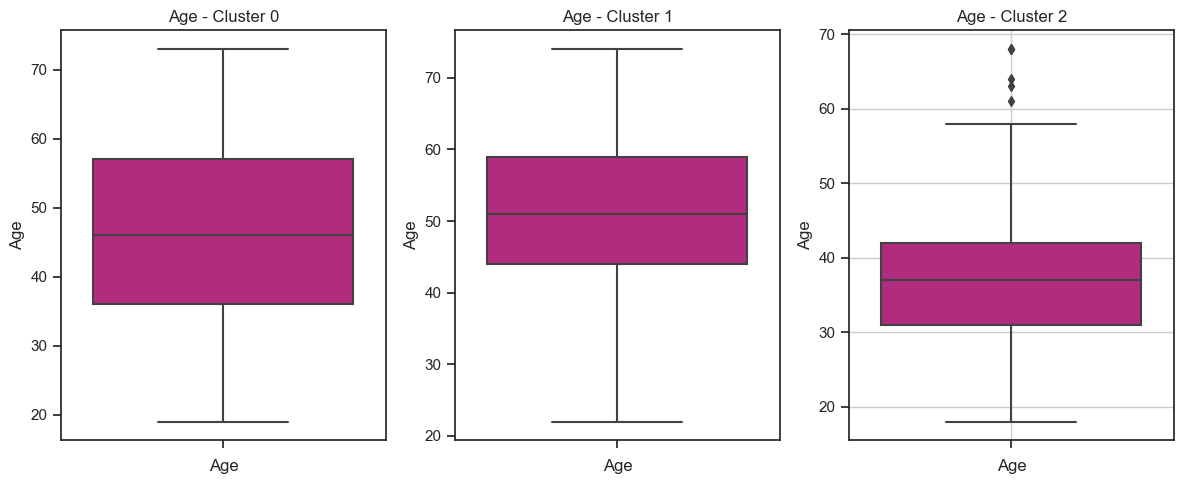

In [57]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

sns.boxplot(data = cluster0_df, y='Age', color='mediumvioletred', ax=axs[0])
axs[0].set_xlabel("Age")
axs[0].set_title("Age - Cluster 0")
plt.grid(True)

sns.boxplot(data = cluster1_df, y='Age', color='mediumvioletred', ax=axs[1])
axs[1].set_xlabel("Age")
axs[1].set_title("Age - Cluster 1")
plt.grid(True)

sns.boxplot(data = cluster2_df, y='Age', color='mediumvioletred', ax=axs[2])
axs[2].set_xlabel("Age")
axs[2].set_title("Age - Cluster 2")
plt.grid(True)

plt.tight_layout()


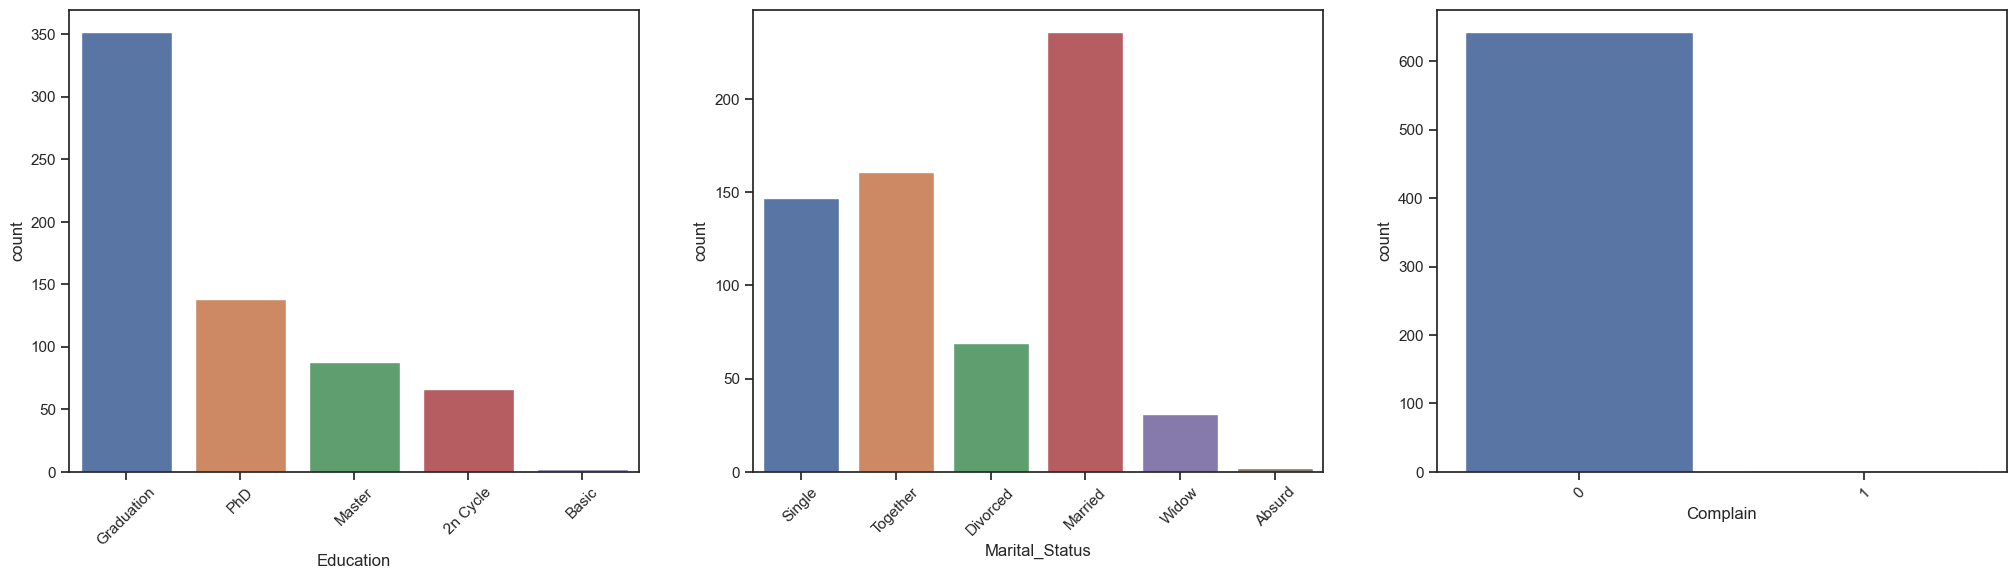

In [58]:
cal_cols = ['Education', 'Marital_Status','Complain']
fig, ax = plt.subplots(1, len(cal_cols), figsize=(25, 6))
for col in enumerate(cal_cols):
    sns.countplot(data=cluster0_df, x=col[1], ax=ax[col[0]])
    ax[col[0]].tick_params(axis='x', rotation=45)

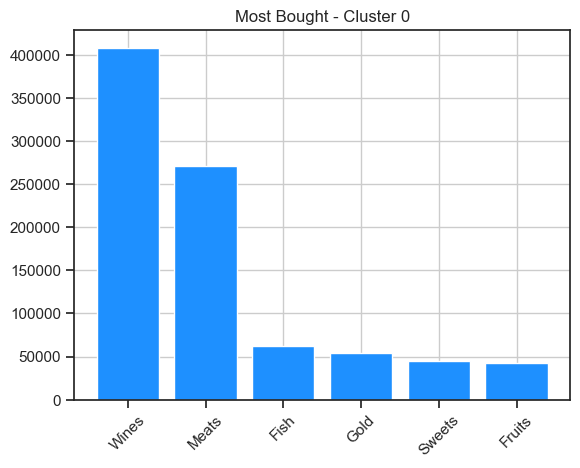

In [26]:
features=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
col_sum = cluster0_df[features].sum(axis=0).sort_values(ascending=False)

plt.bar(col_sum.index, col_sum.values, color='dodgerblue')
plt.title("Most Bought - Cluster 0")
plt.xticks(col_sum.index,['Wines', 'Meats', 'Fish', 'Gold', 'Sweets', 'Fruits'],rotation=45)

plt.grid(True)
plt.show()

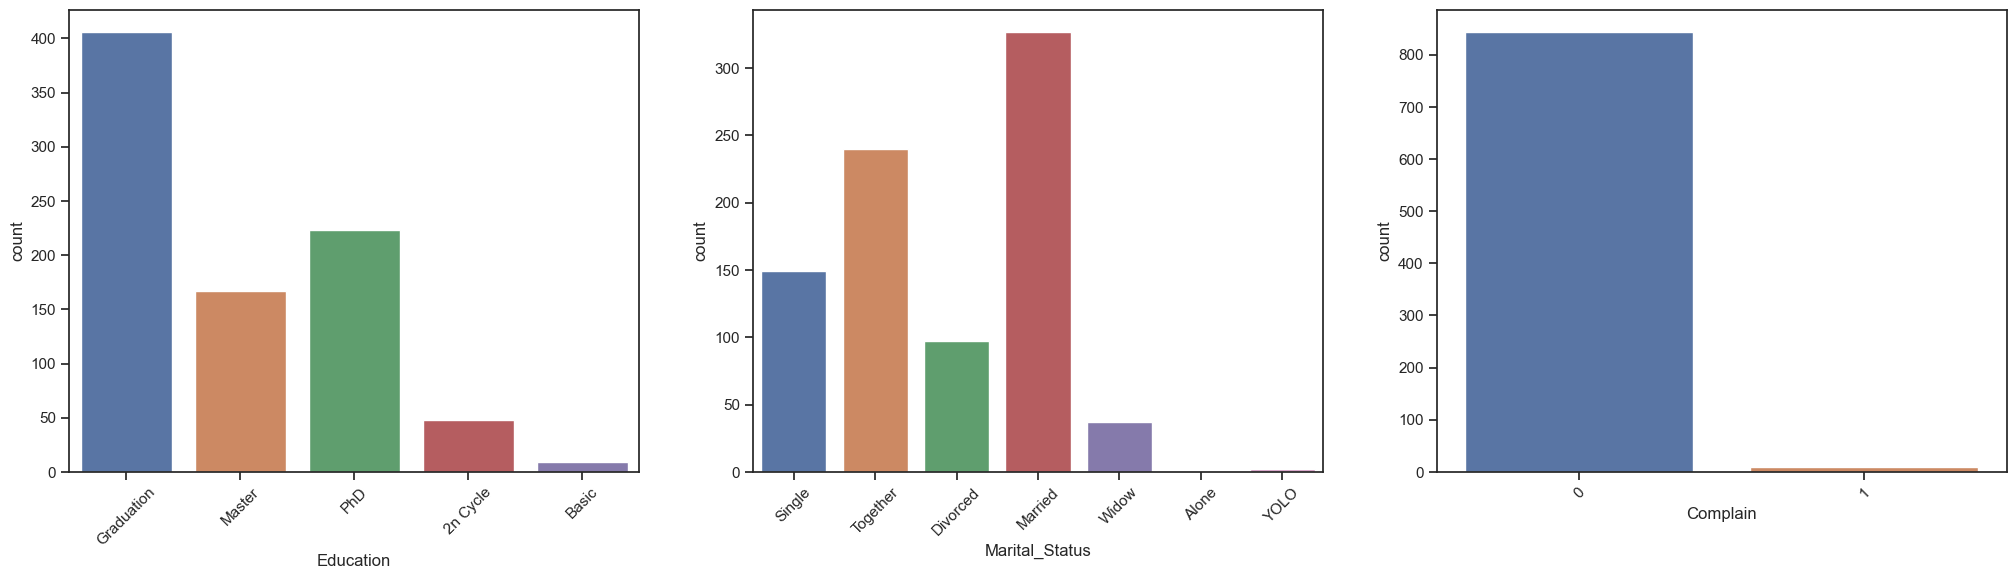

In [59]:

fig, ax = plt.subplots(1, len(cal_cols), figsize=(25, 6))
for col in enumerate(cal_cols):
    sns.countplot(data=cluster1_df, x=col[1], ax=ax[col[0]])
    ax[col[0]].tick_params(axis='x', rotation=45)

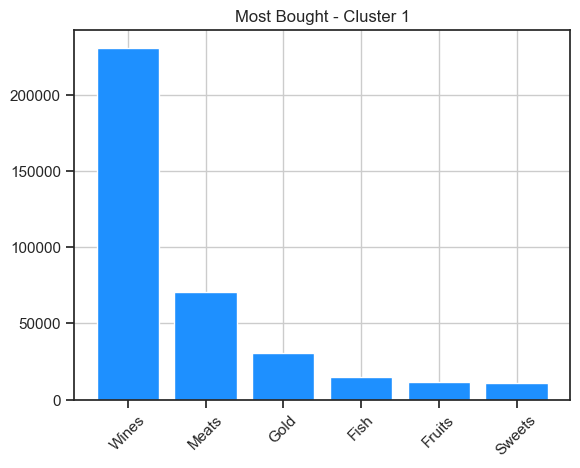

In [28]:
col_sum = cluster1_df[features].sum(axis=0).sort_values(ascending=False)

plt.bar(col_sum.index, col_sum.values, color='dodgerblue')
plt.title("Most Bought - Cluster 1")
plt.xticks(col_sum.index,['Wines', 'Meats', 'Gold', 'Fish', 'Fruits', 'Sweets'],rotation=45)
plt.grid(True)

plt.show()

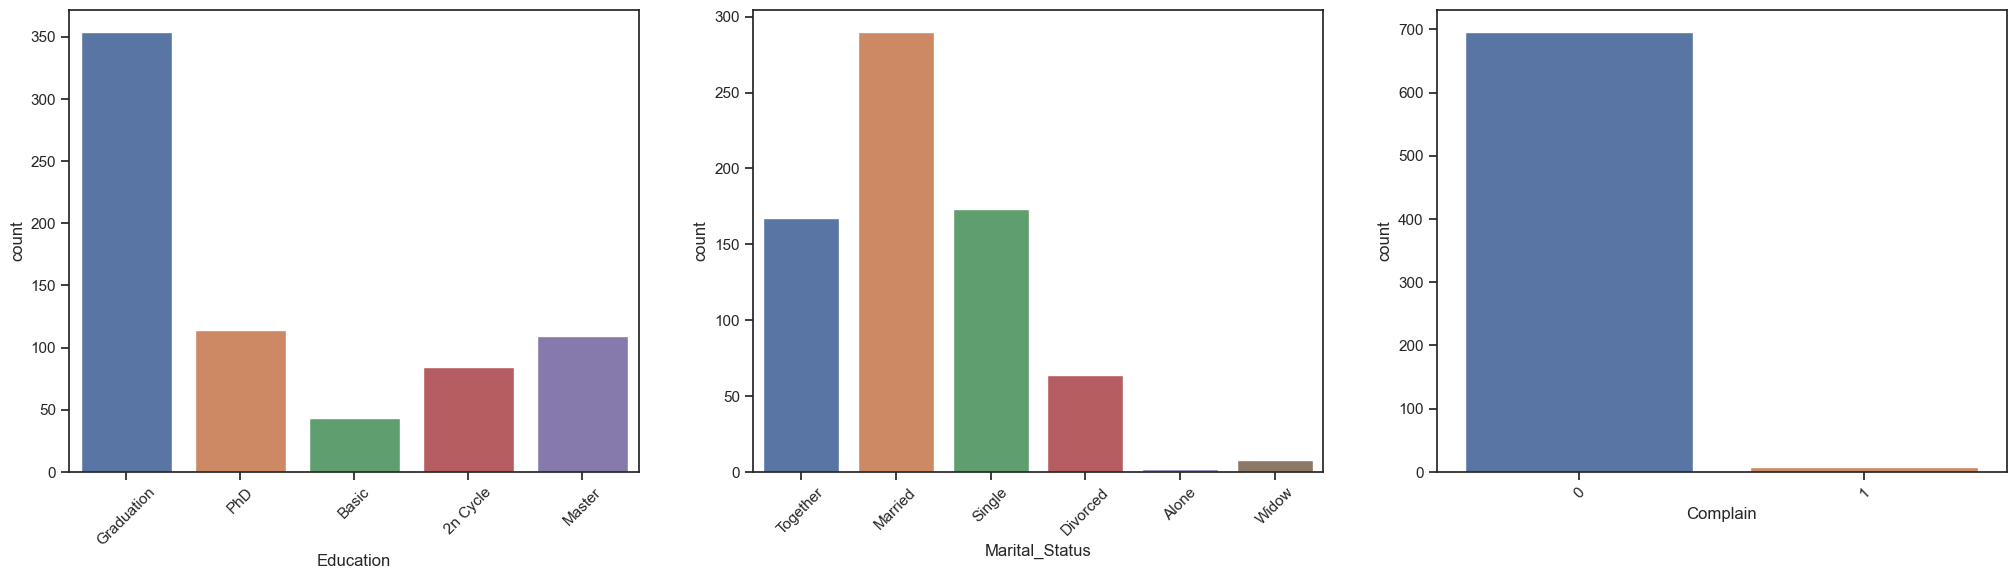

In [60]:

fig, ax = plt.subplots(1, len(cal_cols), figsize=(25, 6))
for col in enumerate(cal_cols):
    sns.countplot(data=cluster2_df, x=col[1], ax=ax[col[0]])
    ax[col[0]].tick_params(axis='x', rotation=45)

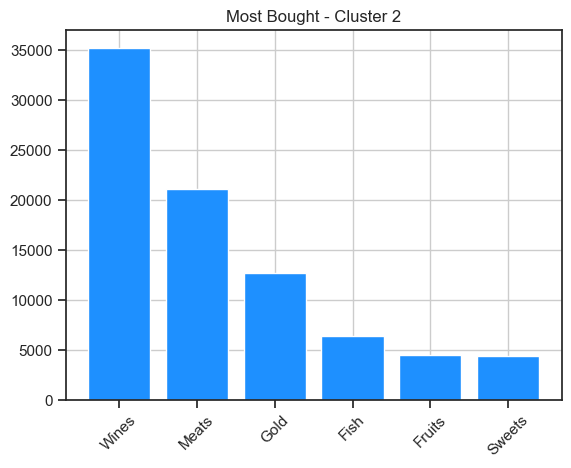

In [30]:
col_sum = cluster2_df[features].sum(axis=0).sort_values(ascending=False)

plt.bar(col_sum.index, col_sum.values, color='dodgerblue')
plt.title("Most Bought - Cluster 2")
plt.xticks(col_sum.index,['Wines', 'Meats', 'Gold', 'Fish', 'Fruits', 'Sweets'],rotation=45)
plt.grid(True)

plt.show()